# Assignment 4

╰ᕦ╯(๑• .̫ •๑)╰ᕤ╯

We continue our pokemon trainer adventure with new best friends: non-linear supervised learning algorithms. You teach me, and I'll teach your models. There's no better team!

The data can be found under `pokedex/pokemons.csv`, and is the same as assignment 1, 2, & 3. Run the cell below to get an overview of the dataset:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('pokedex/pokemons.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Problem 1

The rainbow bird we spotted in the sky last assignment was Ho-oh, a powerful pokemon who's feathers glow in seven colors 🌈. Inspired by this encounter, we want to improve our legendary pokemon detector. Maybe we'll catch one next time! We know that Support Vector Machines (SVM) can learn non-linear decision boundaries, which could help make better predictions.

💪 **Task: Train a SVM classifier with Radial Basis Function (RBF) kernel which predicts if pokemons are `Legendary`.**
- use `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed` as features
- use `Legendary` as label
- scale the features using standardization before you train the model
- store your trained model in a variable called `svm`
- use the `random_state`, `C`, and `gamma` hyperparameters provided below

In [2]:
random_state = 250
C = 20
gamma = 'scale'

#Importing Standard Scaler and Support Vector Classifier Model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#Defining the features and label(s).
features = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
label = df['Legendary']

#Standardizing our features
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)

#Renaming standardized features and labels in accordance with test norms.
X_scaled = features_scaled
y = label.values

#Training our Support Vector Classifier along the RBF Kernel with given conditions
svc = SVC(kernel = 'rbf', C = C, gamma = gamma, random_state = random_state)
svm = svc.fit(X_scaled, y)

In [3]:
import math

def test_svm():
    assert svm, "Can't find svm, have you used the correct variable name for your model?"
    assert math.isclose(0.984, svm.score(X_scaled, y), rel_tol=1e-3), f"Your model predictions don't look quite right"
    print('Success! 🎉')
    print('Ho-oh was classified as not legendary 😞')
    
test_svm()

Success! 🎉
Ho-oh was classified as not legendary 😞


🧠 **Task: List and describe the main steps that happen during your SVM model's _training_ , i.e inside of sklearn's `.fit()` method.**

🧠 **Bonus Task: Explain the effect of hyperparameters `C` and `gamma` on the SVM's optimization.**

💡**Answer 1:** The data from our dataframe is non-seperable in any direct methods, so getting a clear distinct decision boundary is not possible using regular methods. That's where our Radial Basis Function (***RBF***) kernel and support vector machine (***SVM***) comes into play.

We start with a fixed number of dimensions, usually linked to the essential features of our dataset and then adding higher dimensions of the dataset to find their influence regions. ***RBF*** here adds a new point and tries to classify it with the regions based on its location and relationships to other points.

## Problem 2

Our SVM failed to recognise that the flamboyant Ho-oh is a legendary pokemon... Fortunately, we know other non-linear classifiers. Random forests are known for their flexibility, so they might fare better here.

💪 **Task: Train a Random Forest classifier which predicts if pokemons are `Legendary`.**
- use `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed` as features
- use `Legendary` as label
- scale the features using standardization before you train the model
- store your trained model in a variable called `random_forest`
- use the `random_state`, `n_estimators`, and `min_samples_leaf` hyperparameters provided below

In [4]:
random_state = 250
n_estimators = 100
min_samples_leaf = 8

#Scaler Pre-Imported, Importing Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier

#Features and Labels exactly same to the problem above so,
#existing values from memory can be used.
rfc = RandomForestClassifier(random_state = random_state, n_estimators = n_estimators, min_samples_leaf = min_samples_leaf)
random_forest = rfc.fit(X_scaled, y)

In [5]:
def test_random_forest():
    assert random_forest, "Can't find random_forest, have you used the correct variable name for your model?"
    assert math.isclose(0.954, random_forest.score(X_scaled, y), rel_tol=1e-3), f"Your model predictions don't look quite right"
    print('Success! 🎉')
    print('Ho-oh was correctly classified as legendary 😎')
    
test_random_forest()

Success! 🎉
Ho-oh was correctly classified as legendary 😎


🧠 **Task: List and describe the main steps that happen during your random forest model's _training_ , i.e inside of sklearn's `.fit()` method.**

🧠 **Bonus Task: Why do random forests generalize better than decision trees?**

💡**Answer 2:** The Random Forest Model works with decision trees and using these decision trees to calculate the decision boundary and influence regions of our data and its classes. 

Our dataset is taken and random decision trees are made from the features in our dataset. Random features are chosen and used to make a decision tree from random data inside these selected features as various leaves (***nodes***) throughout our decision tree.

This step is repeated until the desired set ***n_estimators*** condition is met. The comparison between these randomly generated decision trees gives us our decision boundary.

## Problem 3

The random forest recognized that Ho-oh is an absolute legend. But we heard that the A.I hype nowadays is all about neural networks... They are notoriously difficult to train, but we are the best trainer there ever was!

💪 **Task: Train a Neural Network classifier which predicts if pokemons are `Legendary`.**
- use `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed` as features
- use `Legendary` as label
- scale the features using standardization before you train the model
- store your trained model in a variable called `nn`
- create a network with 2 hidden layers of 6 neurons each, with ReLU activation
- use the `random_seed`, `optimizer`, `batch_size` and `epochs` hyperparameters provided below

In [6]:
random_seed = 250
optimizer = 'adam'
batch_size=16
epochs=200

#Importing Sequential Model Structure for our Neural Network
from keras.models import Sequential

#Instantiating Dense layers for our Neural Network model.
from keras.layers import Dense

#Scaler Pre-Imported and Features scaled and can be used from memory.

#Training and Storing model according to the stated conditions.
#As per our conditions:

#Features = 6
#Hidden Layers = 2 with Neurons = 6 each.
#Activation layer type = 'relu'

#Non-linear Classifier output so output type = 'sigmoid'
#Output values = 1.

nn = Sequential([
    Dense(6, activation = 'relu', input_dim = 6),
    Dense(6, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

nn.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizer
)

#Importing Tensorflow Backend and setting the random seed and prediction hyperparameters.
import tensorflow as tf

np.random.seed(random_seed)
tf.random.set_seed(random_seed)
history = nn.fit(X_scaled, y, epochs = epochs, batch_size = batch_size)

Using TensorFlow backend.


Epoch 1/200
800/800 [==============================] - 0s 532us/step - loss: 0.5755
Epoch 2/200
800/800 [==============================] - 0s 167us/step - loss: 0.4843
Epoch 3/200
800/800 [==============================] - 0s 232us/step - loss: 0.4109
Epoch 4/200
800/800 [==============================] - 0s 181us/step - loss: 0.3547
Epoch 5/200
800/800 [==============================] - 0s 162us/step - loss: 0.3133
Epoch 6/200
800/800 [==============================] - 0s 180us/step - loss: 0.2827
Epoch 7/200
800/800 [==============================] - 0s 169us/step - loss: 0.2599
Epoch 8/200
800/800 [==============================] - 0s 120us/step - loss: 0.2410
Epoch 9/200
800/800 [==============================] - 0s 118us/step - loss: 0.2251
Epoch 10/200
800/800 [==============================] - 0s 130us/step - loss: 0.2120
Epoch 11/200
800/800 [==============================] - 0s 186us/step - loss: 0.1999
Epoch 12/200
800/800 [==============================] - 0s 153us/step - lo

800/800 [==============================] - 0s 142us/step - loss: 0.0729
Epoch 193/200
800/800 [==============================] - 0s 148us/step - loss: 0.0732
Epoch 194/200
800/800 [==============================] - 0s 219us/step - loss: 0.0728
Epoch 195/200
800/800 [==============================] - 0s 149us/step - loss: 0.0733
Epoch 196/200
800/800 [==============================] - 0s 130us/step - loss: 0.0729
Epoch 197/200
800/800 [==============================] - 0s 117us/step - loss: 0.0727
Epoch 198/200
800/800 [==============================] - 0s 117us/step - loss: 0.0733
Epoch 199/200
800/800 [==============================] - 0s 114us/step - loss: 0.0729
Epoch 200/200
800/800 [==============================] - 0s 121us/step - loss: 0.0731


In [7]:
def test_neural_network():
    assert nn, "Can't find nn, have you used the correct variable name for your model?"
    assert nn.evaluate(X_scaled, y, verbose=0) < 0.1, f"Your model predictions don't look quite right"
    print('Success! 🎉')
    print('Ho-oh was correctly classified as legendary 😎')

test_neural_network()

Success! 🎉
Ho-oh was correctly classified as legendary 😎


🧠 **Task: List and describe the main steps that happen during your neural network's _training_ , i.e inside of keras's `.fit()` method.**

🧠 **Task: List the three different flavours of gradient descent. Which one did we use here? Why is it the most popular?**


🧠 **Bonus Task: If we used a `linear` activation for our hidden layers, would this model be as powerful? why?**

💡**Answer 3(*i*):** We take our scaled feautures and labels and add them to 2 hidden layers in our neural network. Artificial features are made from the calculations based on the weights of the features and their influence which is done by our optimizer of choice alongside their gradient descent. 

Our last layer is the output from where the neural network exits calculated values based on the weights and values from the neurons in the 2 hidden layers.

💡**Answer 3(*ii*):** There are 3 different sorts of gradient descents
- Stochastic
- Batch
- Mini Batch 

Our chosen one is Mini Batch. It's widely popular because of its better capabilities and optimization than the other two options.

In comparison to **Batch**, it uses lesser (more moderate amount) of RAM and is not fixed to descending towards minimum.

Similarly in comparison to **Stochastic**, it doesn't slow down as the progress descends into the neural network.

## Problem 4

We've trained our neural network, and it seems to correctly predict Ho-oh's legendary status. 💯 We want to dig deeper into its optimization process by looking at its loss curve.

💪 **Task: Visualize your neural network's loss curve.**
- store the model's training history in a variable called `history`
- plot its loss curve
- the curve values should be correct, but you will be mostly graded on your data visualization practices
- revisit data viz tips from lecture 2.6

Text(0.5, 1.0, 'Loss Curve Plot')

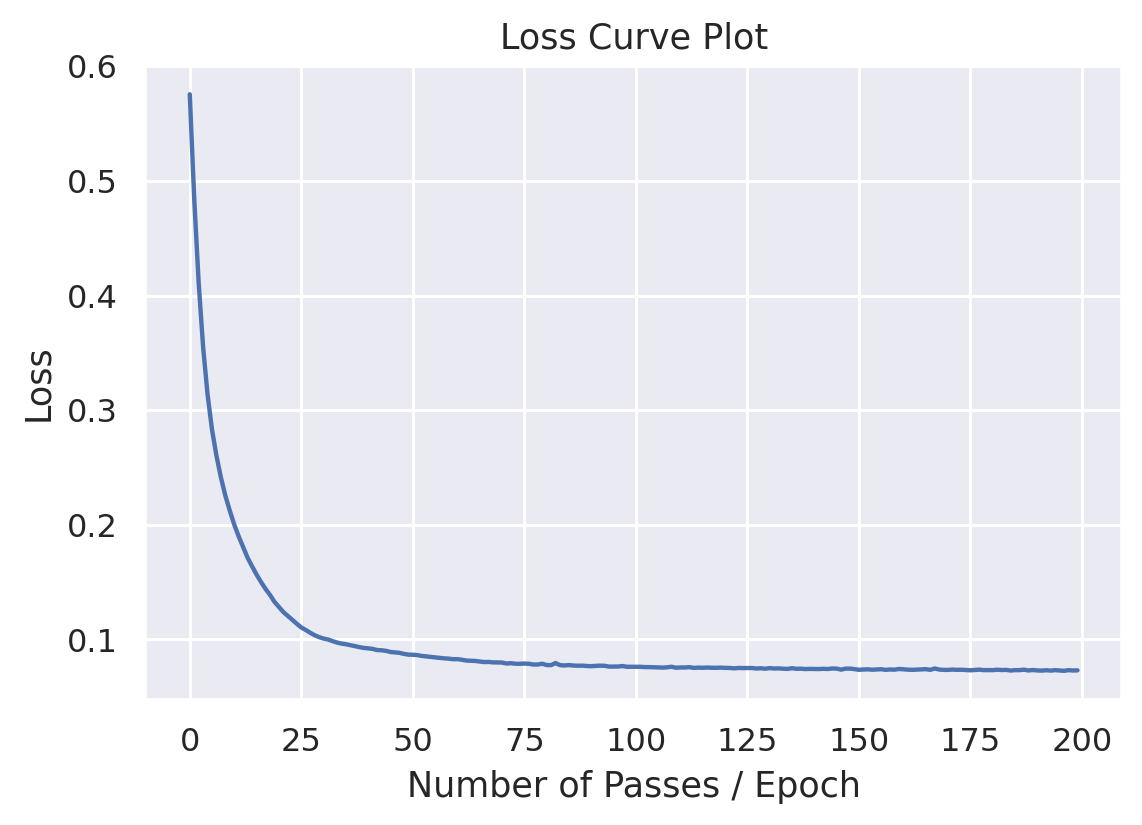

In [8]:
#Model History pre-stored in variable 'history'
#Importing MatplotLib, Seaborn and using plot regression.
import matplotlib.pyplot as plt
import seaborn as sns

#Initializing Seaborn
sns.set()

fig = plt.figure(dpi = 210)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'])
ax.set_xlabel('Number of Passes / Epoch')
ax.set_ylabel('Loss')
ax.set_title('Loss Curve Plot')


In [9]:
def test_loss_curve():
    assert history, "Can't find `history`, have you save the model's history"
    loss = history.history['loss']
    assert len(loss) == 200, f"There are {len(loss)} loss values. There should be 200, one per epoch"
    assert loss[-1] < 0.1, f"Your final loss: {loss[-1]} should be less than 0.1"
    print('Success! 🎉')
    
    
test_loss_curve()

Success! 🎉


🧠 **Task: What does this loss curve say about our neural network training. Why?**

🧠 **Bonus Task: The loss curve doesn't seem to be converging to a loss of 0. List scenarios that could explain to this behaviour, and describe why.**

💡**Answer 4:** It is safe to say that the graph represents that our choice of optimization methods was not the best. The gradient descent, although present, still is not zero even at 200 passes.

## Problem 5

We were lead by ✨adam✨ in our quest to be a pokemon master, but Professor Oak told us that he might not the messiah. 🙀

💪 **Task: Train Neural Network classifiers with different optimizers. Then compare them by plotting their loss curves.**
- use `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed` as features
- use `Legendary` as label
- scale the features using standardization before you train the model
- train one neural network per optimizer listed in `optimizers`
- each network should have 2 hidden layers of 6 neurons each, with ReLU activation
- use the `random_seed`, `batch_size` and `epochs` hyperparameters provided below
- plot each model's loss curve on the same graph
- revisit data viz tips from lecture 2.6
- the unit test is the graph 🙃

In [10]:
random_seed = 250
batch_size=16
epochs=200
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam']

from timeit import default_timer as timer

def train_neural_network(X, y, optimizer='adam', **kwargs):
    # create model
    model = Sequential([
        Dense(6, activation='relu', input_dim=6),
        Dense(6, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    # training reproducibility
    np.random.seed(random_seed)
    tf.random.set_seed(random_seed)
    
    # train and time model
    start = timer()
    history = model.fit(X, y, **kwargs)
    end = timer()
    
    time = end - start
    return history, time

from collections import namedtuple
from keras.callbacks import Callback

class LossPerBatch(Callback):
    def on_train_begin(self, logs={}):
        self.history = {}
        self.history['loss'] = []

    def on_batch_end(self, batch, logs={}):
        self.history['loss'].append(logs['loss'])

Result = namedtuple('Result', ['optimizer', 'history', 'history_per_batch', 'time'])
results = []

for o in optimizers:
    history_per_batch = LossPerBatch()
    history, time = train_neural_network(X_scaled, y, optimizer=o, batch_size = batch_size, epochs = epochs, callbacks=[history_per_batch])
    results.append(Result(o, history, history_per_batch, time))

Epoch 1/200
800/800 [==============================] - 0s 303us/step - loss: 0.5207
Epoch 2/200
800/800 [==============================] - 0s 123us/step - loss: 0.4540
Epoch 3/200
800/800 [==============================] - 0s 116us/step - loss: 0.4030
Epoch 4/200
800/800 [==============================] - 0s 185us/step - loss: 0.3634
Epoch 5/200
800/800 [==============================] - 0s 156us/step - loss: 0.3328
Epoch 6/200
800/800 [==============================] - 0s 141us/step - loss: 0.3092
Epoch 7/200
800/800 [==============================] - 0s 162us/step - loss: 0.2907
Epoch 8/200
800/800 [==============================] - 0s 123us/step - loss: 0.2756
Epoch 9/200
800/800 [==============================] - 0s 152us/step - loss: 0.2637
Epoch 10/200
800/800 [==============================] - 0s 123us/step - loss: 0.2544
Epoch 11/200
800/800 [==============================] - 0s 116us/step - loss: 0.2469
Epoch 12/200
800/800 [==============================] - 0s 130us/step - lo

800/800 [==============================] - 0s 105us/step - loss: 0.0981
Epoch 192/200
800/800 [==============================] - 0s 100us/step - loss: 0.0976
Epoch 193/200
800/800 [==============================] - 0s 139us/step - loss: 0.0977
Epoch 194/200
800/800 [==============================] - 0s 109us/step - loss: 0.0973
Epoch 195/200
800/800 [==============================] - 0s 103us/step - loss: 0.0974
Epoch 196/200
800/800 [==============================] - 0s 102us/step - loss: 0.0971
Epoch 197/200
800/800 [==============================] - 0s 102us/step - loss: 0.0972
Epoch 198/200
800/800 [==============================] - 0s 159us/step - loss: 0.0972
Epoch 199/200
800/800 [==============================] - 0s 153us/step - loss: 0.0970
Epoch 200/200
800/800 [==============================] - 0s 112us/step - loss: 0.0968
Epoch 1/200
800/800 [==============================] - 0s 325us/step - loss: 0.5117
Epoch 2/200
800/800 [==============================] - 0s 161us/step -

800/800 [==============================] - 0s 124us/step - loss: 0.0773
Epoch 183/200
800/800 [==============================] - 0s 127us/step - loss: 0.0765
Epoch 184/200
800/800 [==============================] - 0s 128us/step - loss: 0.0765
Epoch 185/200
800/800 [==============================] - 0s 116us/step - loss: 0.0761
Epoch 186/200
800/800 [==============================] - 0s 114us/step - loss: 0.0764
Epoch 187/200
800/800 [==============================] - 0s 120us/step - loss: 0.0764
Epoch 188/200
800/800 [==============================] - 0s 169us/step - loss: 0.0759
Epoch 189/200
800/800 [==============================] - 0s 201us/step - loss: 0.0762
Epoch 190/200
800/800 [==============================] - 0s 144us/step - loss: 0.0759
Epoch 191/200
800/800 [==============================] - 0s 154us/step - loss: 0.0761
Epoch 192/200
800/800 [==============================] - 0s 111us/step - loss: 0.0755
Epoch 193/200
800/800 [==============================] - 0s 103us/st

800/800 [==============================] - 0s 160us/step - loss: 0.0740
Epoch 174/200
800/800 [==============================] - 0s 123us/step - loss: 0.0737
Epoch 175/200
800/800 [==============================] - 0s 115us/step - loss: 0.0737
Epoch 176/200
800/800 [==============================] - 0s 110us/step - loss: 0.0732
Epoch 177/200
800/800 [==============================] - 0s 159us/step - loss: 0.0733
Epoch 178/200
800/800 [==============================] - 0s 112us/step - loss: 0.0728
Epoch 179/200
800/800 [==============================] - 0s 144us/step - loss: 0.0715
Epoch 180/200
800/800 [==============================] - 0s 142us/step - loss: 0.0720
Epoch 181/200
800/800 [==============================] - 0s 107us/step - loss: 0.0712
Epoch 182/200
800/800 [==============================] - 0s 166us/step - loss: 0.0713
Epoch 183/200
800/800 [==============================] - 0s 177us/step - loss: 0.0713
Epoch 184/200
800/800 [==============================] - 0s 131us/st

800/800 [==============================] - 0s 117us/step - loss: 0.0917
Epoch 165/200
800/800 [==============================] - 0s 111us/step - loss: 0.0916
Epoch 166/200
800/800 [==============================] - 0s 138us/step - loss: 0.0915
Epoch 167/200
800/800 [==============================] - 0s 127us/step - loss: 0.0913
Epoch 168/200
800/800 [==============================] - 0s 152us/step - loss: 0.0914
Epoch 169/200
800/800 [==============================] - 0s 156us/step - loss: 0.0914
Epoch 170/200
800/800 [==============================] - 0s 140us/step - loss: 0.0912
Epoch 171/200
800/800 [==============================] - 0s 131us/step - loss: 0.0910
Epoch 172/200
800/800 [==============================] - 0s 177us/step - loss: 0.0909
Epoch 173/200
800/800 [==============================] - 0s 129us/step - loss: 0.0907 0s - loss: 0.093
Epoch 174/200
800/800 [==============================] - 0s 175us/step - loss: 0.0907
Epoch 175/200
800/800 [============================

800/800 [==============================] - 0s 104us/step - loss: 0.1296
Epoch 155/200
800/800 [==============================] - 0s 94us/step - loss: 0.1294
Epoch 156/200
800/800 [==============================] - 0s 107us/step - loss: 0.1293
Epoch 157/200
800/800 [==============================] - 0s 95us/step - loss: 0.1292
Epoch 158/200
800/800 [==============================] - 0s 115us/step - loss: 0.1291
Epoch 159/200
800/800 [==============================] - 0s 128us/step - loss: 0.1289
Epoch 160/200
800/800 [==============================] - 0s 128us/step - loss: 0.1288
Epoch 161/200
800/800 [==============================] - 0s 160us/step - loss: 0.1287
Epoch 162/200
800/800 [==============================] - 0s 109us/step - loss: 0.1286
Epoch 163/200
800/800 [==============================] - 0s 138us/step - loss: 0.1285
Epoch 164/200
800/800 [==============================] - 0s 172us/step - loss: 0.1283
Epoch 165/200
800/800 [==============================] - 0s 125us/step

800/800 [==============================] - 0s 158us/step - loss: 0.1028
Epoch 145/200
800/800 [==============================] - 0s 106us/step - loss: 0.1029
Epoch 146/200
800/800 [==============================] - 0s 124us/step - loss: 0.1028
Epoch 147/200
800/800 [==============================] - 0s 121us/step - loss: 0.1023
Epoch 148/200
800/800 [==============================] - 0s 110us/step - loss: 0.1023
Epoch 149/200
800/800 [==============================] - 0s 103us/step - loss: 0.1021
Epoch 150/200
800/800 [==============================] - 0s 108us/step - loss: 0.1019
Epoch 151/200
800/800 [==============================] - 0s 102us/step - loss: 0.1018
Epoch 152/200
800/800 [==============================] - 0s 116us/step - loss: 0.1015
Epoch 153/200
800/800 [==============================] - 0s 111us/step - loss: 0.1015
Epoch 154/200
800/800 [==============================] - 0s 111us/step - loss: 0.1014
Epoch 155/200
800/800 [==============================] - 0s 106us/st

800/800 [==============================] - 0s 186us/step - loss: 0.0683
Epoch 136/200
800/800 [==============================] - 0s 188us/step - loss: 0.0679
Epoch 137/200
800/800 [==============================] - 0s 225us/step - loss: 0.0677
Epoch 138/200
800/800 [==============================] - 0s 187us/step - loss: 0.0680
Epoch 139/200
800/800 [==============================] - 0s 253us/step - loss: 0.0678
Epoch 140/200
800/800 [==============================] - 0s 158us/step - loss: 0.0676
Epoch 141/200
800/800 [==============================] - 0s 191us/step - loss: 0.0673
Epoch 142/200
800/800 [==============================] - 0s 193us/step - loss: 0.0671
Epoch 143/200
800/800 [==============================] - 0s 297us/step - loss: 0.0676
Epoch 144/200
800/800 [==============================] - 0s 259us/step - loss: 0.0672
Epoch 145/200
800/800 [==============================] - 0s 149us/step - loss: 0.0664
Epoch 146/200
800/800 [==============================] - 0s 217us/st

Text(0.5, 1.0, 'Loss Curve Plot for Various Optimizers')

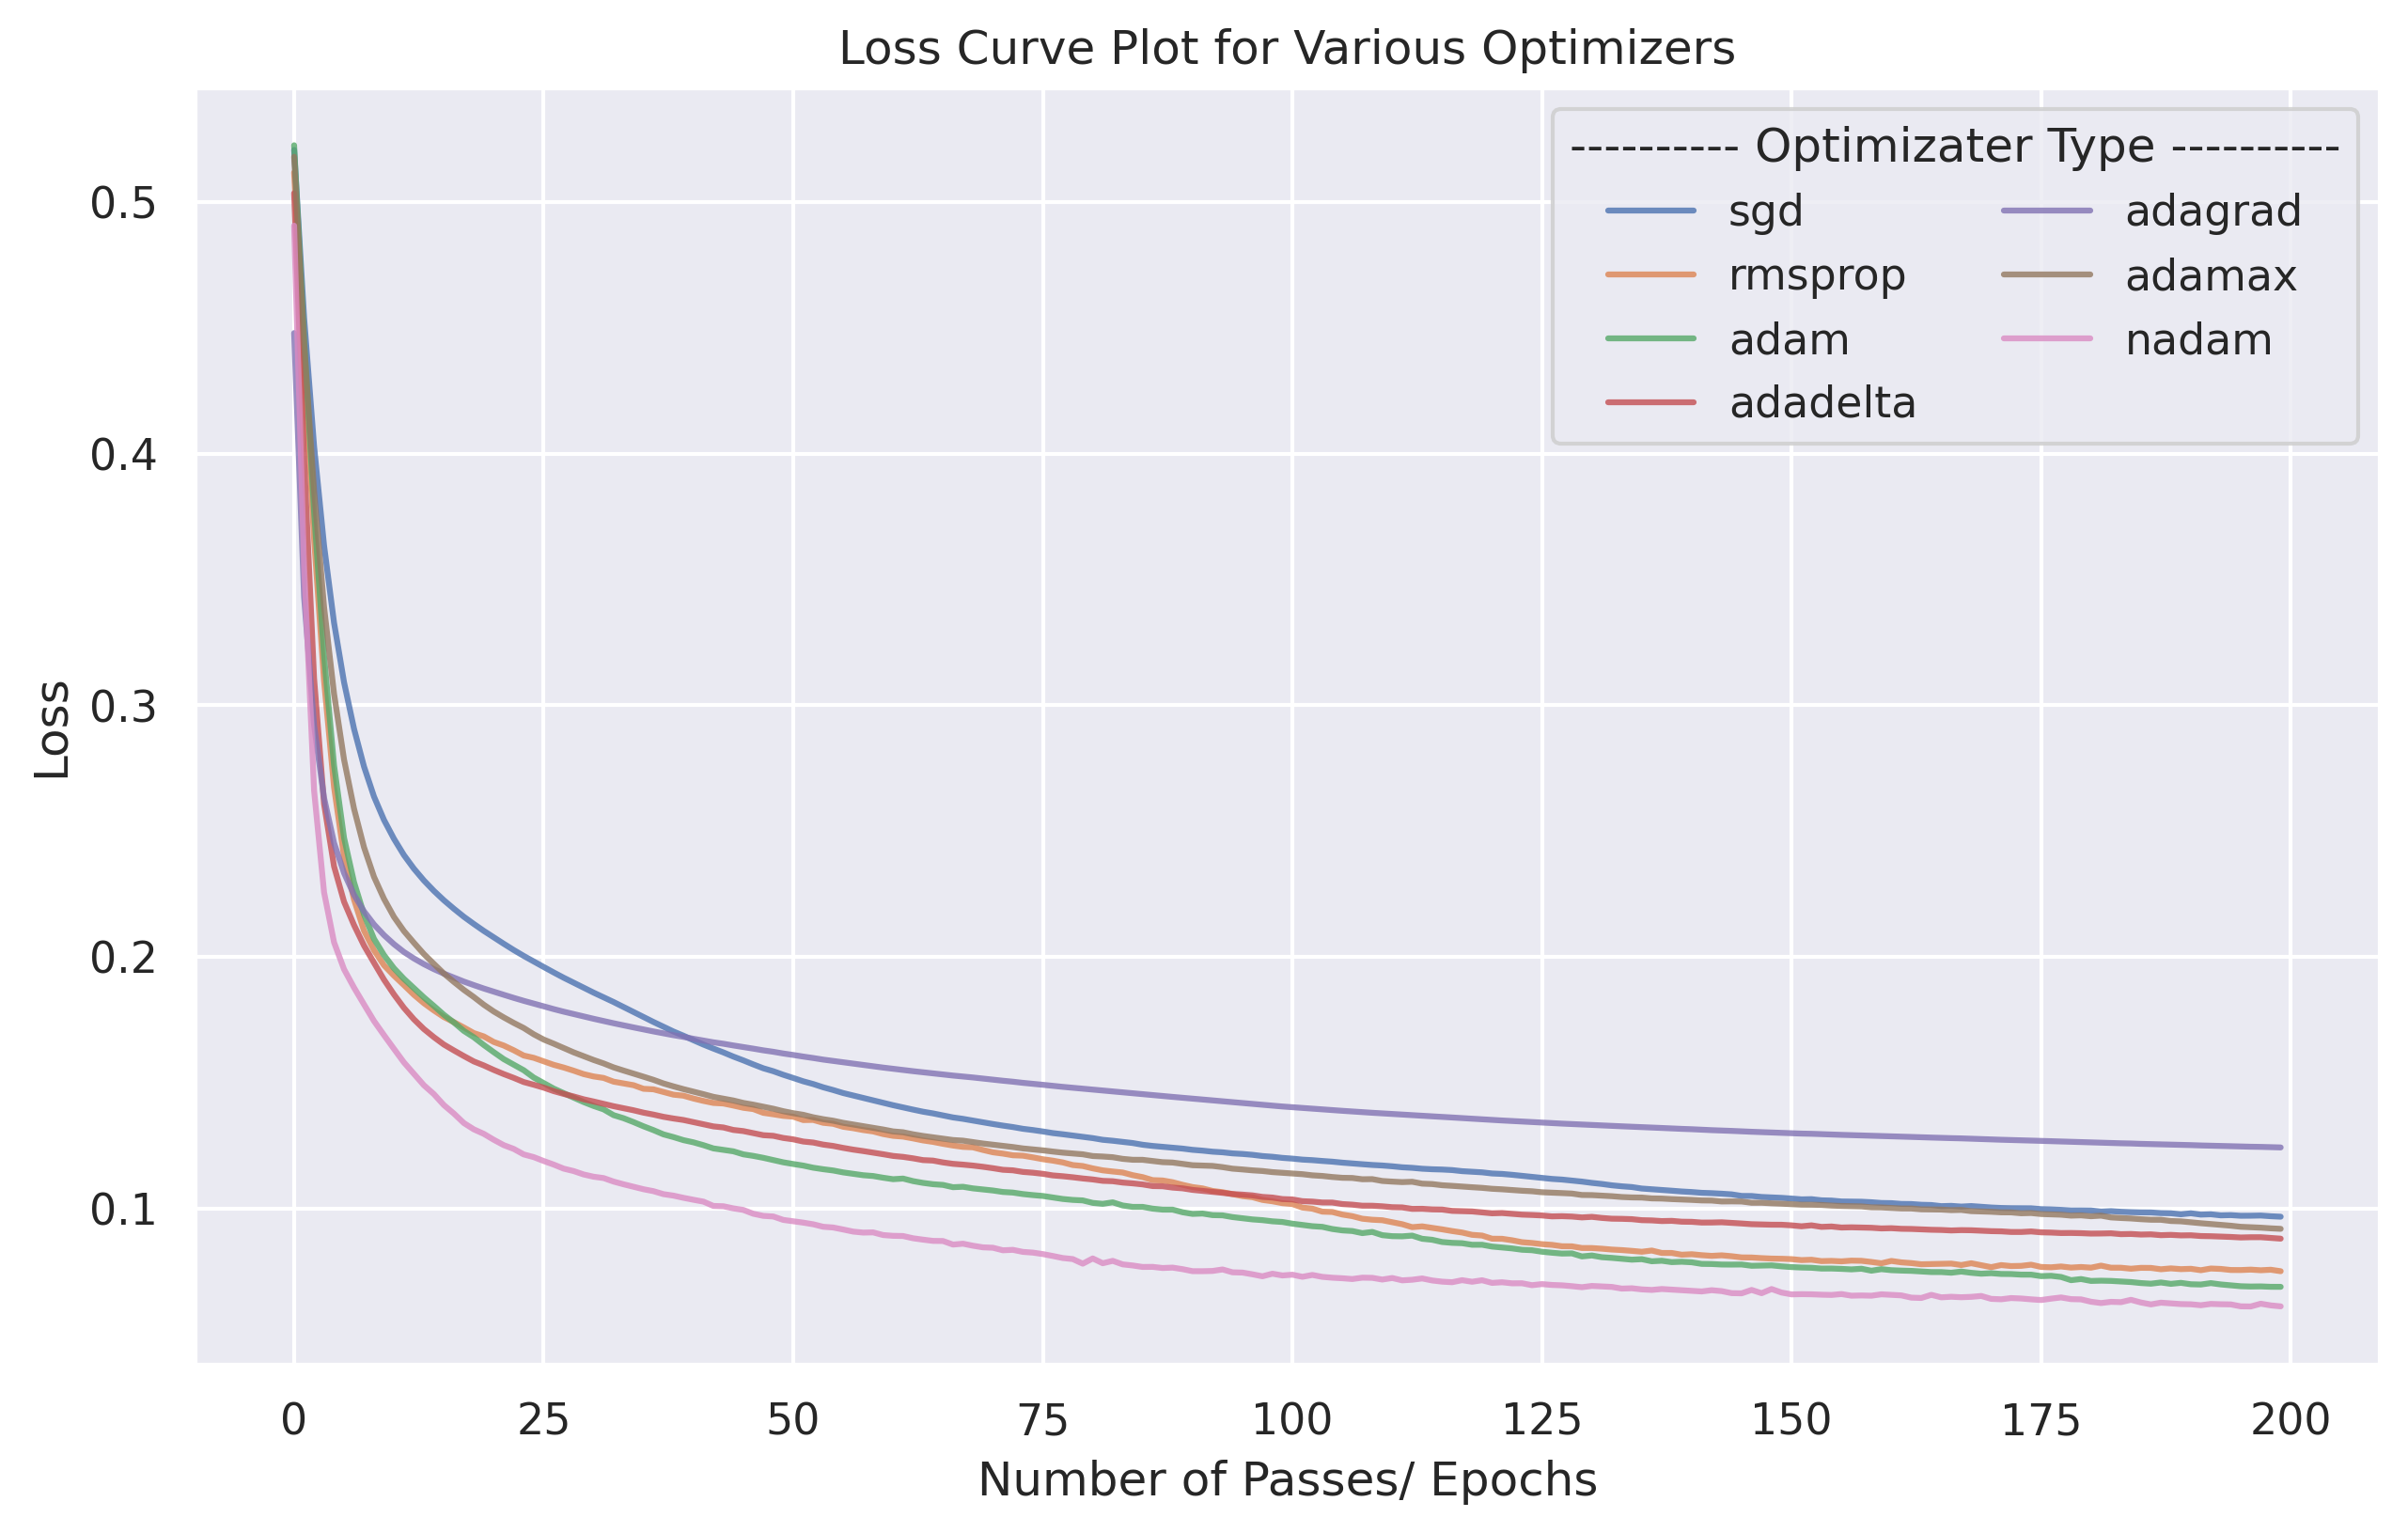

In [11]:
fig = plt.figure(figsize=(10, 6), dpi=300)
ax = fig.add_subplot(111)

for r in results:
    ax.plot(r.history.history['loss'], label=r.optimizer, alpha=0.8)
    
ax.set_xlabel('Number of Passes/ Epochs')
ax.set_ylabel('Loss')
ax.legend(loc = 'upper right', ncol=2, title = '---------- Optimizater Type ----------');
ax.set_title('Loss Curve Plot for Various Optimizers')

🧠 **Bonus Task: According to your graph, which is the best optimizer? Explain how this optimizer works _(you might have to look it up in the lecture resources)_.**

🧠 **Bonus Task: The best optimizer on your graph might still not be the best optimizer choice for our neural network. Why?**